<a href="https://colab.research.google.com/github/hyounghe0724/StartPytorch/blob/main/Multi_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
cd /content/gdrive/My Drive/GoogleColab/deeplearningbrov2/pytorch

/content/gdrive/My Drive/GoogleColab/deeplearningbrov2/pytorch


In [15]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# ANN
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F # 신경망 기술 등

# Plot
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('./data/reg.csv', index_col=[0])

In [17]:
df.head(10)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Price
0,0.034633,0.206919,0.137057,0.540526,0.193941,0.699239,0.630532,0.239410,0.027375,0.209857,0.347609,0.996394,0.102644,0.422222
1,0.028920,0.014315,0.276113,0.255945,0.618886,0.555407,0.782263,0.482977,0.103031,0.106690,0.520776,0.996650,0.187120,0.368889
2,0.020627,0.033230,0.281116,0.525591,0.165269,0.624102,0.586005,0.272713,0.036010,0.106986,0.595301,0.983284,0.084079,0.660000
3,0.022749,0.033801,0.125044,0.263253,0.251509,0.658532,0.432160,0.344932,0.150018,0.068317,0.651297,0.989989,0.015990,0.631111
4,0.022148,0.029374,0.121057,0.521126,0.399670,0.448086,0.520158,0.495342,0.104383,0.069360,0.560116,0.998723,0.092782,0.693333
5,0.038651,0.019568,0.139449,0.719852,0.560581,0.610531,0.578661,0.387926,0.133629,0.072967,0.514078,0.986385,0.127396,0.526667
6,0.033301,0.136658,0.336651,0.274996,0.472140,0.331155,0.643546,0.661869,0.270651,0.239929,0.475964,0.993516,0.300521,0.397778
7,0.026858,0.151993,0.300627,0.115449,0.463345,0.532618,0.938389,0.465781,0.139893,0.238901,0.243669,0.991425,0.431171,0.491111
8,0.021739,0.132378,0.259349,0.488716,0.389581,0.411536,0.984672,0.526151,0.201324,0.236329,0.306712,0.965204,0.767177,0.255556
9,0.014588,0.144471,0.331099,0.759479,0.696532,0.334544,0.834204,0.611416,0.174935,0.237351,0.437982,0.967070,0.445798,0.308889


In [18]:
X = df.drop("Price", axis = 1).to_numpy() # 데이터프레임에서 Price, 타겟값을 제외하고 넘파이 배열로 만들기
Y = df["Price"].to_numpy().reshape((-1,1)) # 데이터프레임 형태의 타겟값을 넘파이 배열로 만들기

In [19]:
# 텐서 데이터로 변환하는 클래스 3강 참고.
class TensorData(Dataset):

  def __init__(self, x_data, y_data):
    self.x_data = torch.FloatTensor(x_data)
    self.y_data = torch.FloatTensor(y_data)
    self.len = self.y_data.shape[0]

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return  self.len

In [20]:
# 전체 데이터를 학습 데이터와 평가 데이터로 나눈다.
# test size를 0.5로 설정한다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# 학습 데이터, 시험 데이터 배치 형태로 구축하기
trainsets = TensorData(X_train, Y_train)
trainloader = DataLoader(trainsets, batch_size=32, shuffle=True)

testsets = TensorData(X_test, Y_test)
testloader = DataLoader(testsets, batch_size=32, shuffle=False)

In [21]:
#모델 구축
class Regressor(nn.Module):
  def __init__(self):
    super().__init__() # 모델 연산 정의
    self.fc1 = nn.Linear(13,50,bias=True)
    self.fc2 = nn.Linear(50,30, bias=True)
    self.fc3 = nn.Linear(30,1, bias=True)
    self.dropout = nn.Dropout(0.2) # 연산이 될 때 마다 20% 비율로 랜덤하게 노드를 없앤다.

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.relu(self.fc3(x))

    return x

  # dropout은 과적합을 방지하기 위해 노드의 일부를 배제하고 계산하는 방식이기 때문에, 절대로 출력층에 사용해서는 안된다


In [22]:
#모델, 손실함수, 최적화 방법 선언
model = Regressor()
compiled_model = torch.compile(model)
criterion = nn.MSELoss()
#lr은 학습률,
# weight_decay는 L2 정규화에서의 penalty 정도를 의미한다. 1e-2:0.01
optimizer = optim.Adam(compiled_model.parameters(), lr=1e-2, weight_decay=1e-7)



In [27]:
pret = 1 # 학습된 모델이 있으면 1

if pret == 1:
  checkpoint = torch.load("./models/reg4-1.pt")
  compiled_model.load_state_dict(checkpoint['model'])
  optimizer.load_state_dict(checkpoint['optimizer'])
  loss_ = checkpoint['loss']
  ep = checkpoint['epoch']
  ls = loss_[-1]
  print(f"epoch={ep}, loss={ls}")
else:
  ep = 0
  ls = 1
  loss_ = []

epoch=0, loss=0.003572474146494642


<ipython-input-27-b95d383198ac>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("./models/reg4-1.pt")


In [28]:
# 학습 진행
ls = 1
loss_ = []
n = len(trainloader)

for epoch in range(ep, ep+200):
  running_loss = 0.0

  for data in trainloader: # 무작위로 섞인 32개의 데이터가 있는 배치가 하나 씩 들어온다.

    inputs, values = data # X, Y
    optimizer.zero_grad() # 최적화 초기화

    outputs = compiled_model(inputs)
    loss = criterion(outputs, values )#  손실 함수 계산
    loss.backward() # 역전파
    optimizer.step() #  역전파를 진행하고 가중치를 업데이트

    running_loss += loss.item()# epoch마다 평균 loss를 계산하기 위해 배치 loss를 더한다.

  l = running_loss / n
  loss_.append(l)

  if l<ls:
    ls = l
    torch.save({
        "epoch" : ep,
        "loss" : loss_,
        'model' : compiled_model.state_dict(),
        "optimizer" : optimizer.state_dict()
    }, "./models/reg4-1.pt")
print("finished Training")

finished Training


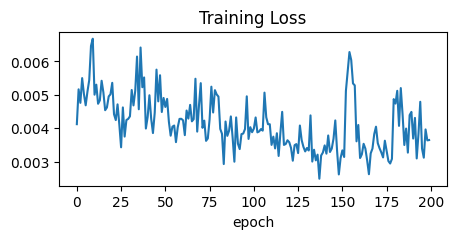

In [29]:
plt.figure(figsize=(5,2))
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()